# AIRLINES LOYALTY SYSTEM

    * Loading the first file and creating the DF

In [1]:
import pandas as pd
df_customers= pd.read_csv(r"C:\Users\javie\OneDrive\Escritorio\Airline Loyalty Program\DB_Airlines_customers.csv")
df_customers.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,383914.0,Standard,2016.0,2.0,0.0,0.0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,0.0,Divorced,Star,383961.0,Standard,2016.0,3.0,0.0,0.0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,0.0,Single,Star,383975.0,Standard,2014.0,7.0,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,0.0,Single,Star,383975.0,Standard,2013.0,2.0,0.0,0.0
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,384279.0,Standard,2014.0,10.0,0.0,0.0


    * Checking the DF's info

In [2]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16739 entries, 0 to 16738
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16739 non-null  object 
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              16738 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  float64
 13  Enrollment Month    16737 non-null  float64
 14  Cancellation Year   16738 non-null  float64
 15  Cancellation Month  16738 non-null  float64
dtypes: f

    * Loading the second file and creating the second DF

In [3]:
df_movements = pd.read_csv(r"C:\Users\javie\OneDrive\Escritorio\Airline Loyalty Program\DB_Customer Flight Activity.csv")
df_movements.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


    * Checking the DF's info

In [4]:
df_movements.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


    * I realized that the Loyalty Number column doesn't have the same datatype across both DataFrames, so I changed it to ensure compatibility and make the merge work.

In [5]:
df_movements['Loyalty Number'] = df_movements['Loyalty Number'].astype(str)


    * Checking everything is ok now

In [6]:
df_movements.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  object 
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 24.0+ MB


    * Doing the merge I realize something must be wrong because got 0 rows as result....!!!

In [7]:
df_merge= pd.merge(df_customers,df_movements, on="Loyalty Number", how="inner") 
df_merge.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Loyalty Number, Country, Province, City, Postal Code, Gender, Education, Salary, Marital Status, Loyalty Card, CLV, Enrollment Type, Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month, Year, Month, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed]
Index: []

[0 rows x 23 columns]>

    * Looking for possible errors, I found this: extra spaces or invisible characters.
        The values may have additional spaces or invisible characters (such as line breaks).
        Then I use this script to fixe it . 

In [8]:
df_customers['Loyalty Number'] = df_customers['Loyalty Number'].str.strip()
df_movements['Loyalty Number'] = df_movements['Loyalty Number'].str.strip()

    * Doing the merge again 

In [9]:
df_merge= pd.merge(df_customers,df_movements, on="Loyalty Number", how="inner") 
df_merge.head

<bound method NDFrame.head of        Loyalty Number Country  Province      City Postal Code  Gender  \
0              480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
1              480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
2              480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
3              480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
4              480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
...               ...     ...       ...       ...         ...     ...   
392931         652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
392932         652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
392933         652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
392934         652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
392935         652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   

       Education   Salary Marital Status Loyalty Card  ...  Enrollment Month  \
0       Bache

    * Let's see the DF info

In [10]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  object 
 1   Country                      392936 non-null  object 
 2   Province                     392936 non-null  object 
 3   City                         392936 non-null  object 
 4   Postal Code                  392936 non-null  object 
 5   Gender                       392936 non-null  object 
 6   Education                    392936 non-null  object 
 7   Salary                       392936 non-null  float64
 8   Marital Status               392936 non-null  object 
 9   Loyalty Card                 392936 non-null  object 
 10  CLV                          392936 non-null  float64
 11  Enrollment Type              392936 non-null  object 
 12  Enrollment Year              392936 non-null  float64
 13 

    * View card types available in the DF

In [11]:
df_merge["Loyalty Card"].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

    * View the column Enrollment Type

In [12]:
df_merge["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

    * View customers education level 

In [13]:
df_merge["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

    * View the marital status

In [14]:
df_merge["Marital Status"].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

    * View the customer's gender available in the DF

In [15]:
df_merge["Gender"].unique()

array(['Female', 'Male'], dtype=object)

    * Show the TOP 30 customers with the most points accumulated

In [16]:
df_sorted_by_points_accum = df_merge.sort_values(by="Points Accumulated", ascending=False)
df_sorted_by_points_accum_subset = df_sorted_by_points_accum[["Loyalty Number", "Points Accumulated","Gender","Marital Status","Education"]]
df_sorted_by_points_accum_subset.head(30)


,Loyalty Number,Points Accumulated,Gender,Marital Status,Education
48520,797704,100926.0,Female,Married,Bachelor
338216,920326,100884.0,Male,Divorced,Bachelor
71022,689839,100296.0,Male,Single,College
46525,110065,97776.0,Male,Single,Bachelor
174774,728586,95214.0,Female,Married,Bachelor
361533,488130,89820.0,Female,Single,College
3112,366540,89676.0,Female,Married,Bachelor
115284,832983,88740.0,Male,Single,Bachelor
335119,724071,88668.0,Male,Single,Bachelor
245328,433857,88668.0,Male,Married,Bachelor


    * Looking at the salary mean by education

In [56]:
salary_by_eduaction = round(df_merge.groupby(["Education"])["Salary"].mean(),2)
salary_by_eduaction = pd.DataFrame(salary_by_eduaction,columns=["Salary"])
salary_by_eduaction = salary_by_eduaction.reset_index()
salary_by_eduaction["Salary"] = salary_by_eduaction["Salary"]
salary_by_eduaction

,Education,Salary
0,Bachelor,72851.99
1,College,0.00
2,Doctor,175992.24
3,High School or Below,60974.30
4,Master,103863.98


    * Let's create a bar plot with the salary_by_education data frame.

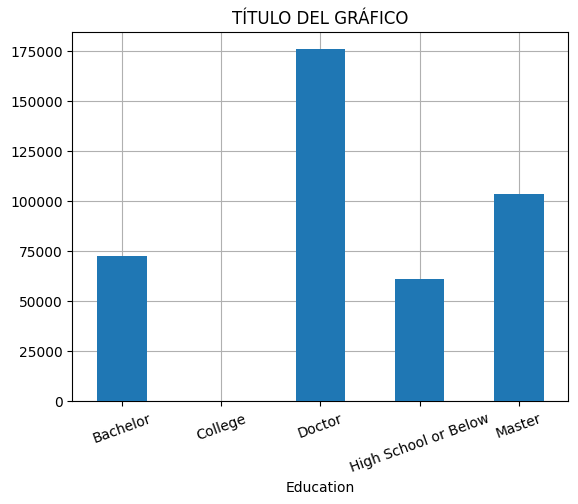

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns 
salary_by_eduaction.groupby('Education')['Salary'].mean().plot(kind='bar', stacked=True,zorder=3)
plt.title('TÍTULO DEL GRÁFICO')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

    * Creating a data frame with total flights group by marital status

In [30]:
flights_by_maritals = df_merge.groupby(["Marital Status"])["Total Flights"].sum()
flights_by_maritals = pd.DataFrame(flights_by_maritals,columns=["Total Flights"])
flights_by_maritals = flights_by_maritals.reset_index()
flights_by_maritals["Total Flights"] = flights_by_maritals["Total Flights"]
flights_by_maritals

,Marital Status,Total Flights
0,Divorced,75860
1,Married,295540
2,Single,137408


    * Now a Pie chart to show the data frame flights_by_maritals

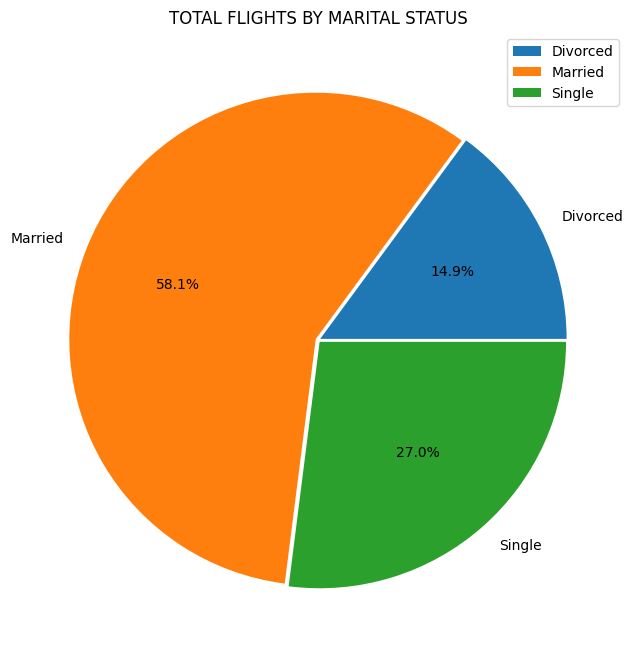

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
explode = [0.01] * len(flights_by_maritals)
plt.pie(flights_by_maritals['Total Flights'], labels=flights_by_maritals['Marital Status'], autopct='%1.1f%%',explode= explode)
plt.title('TOTAL FLIGHTS BY MARITAL STATUS')
plt.legend()
plt.show()

     

In [65]:
df_merge


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2.0,0.0,0.0,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2.0,0.0,0.0,2017,5,4,4908,4908.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2.0,0.0,0.0,2017,6,4,6948,6948.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2.0,0.0,0.0,2017,8,4,5516,5516.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2.0,0.0,0.0,2018,4,4,4376,4376.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392931,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,12.0,2016.0,8.0,2018,8,0,0,0.0,0,0
392932,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,12.0,2016.0,8.0,2018,9,0,0,0.0,0,0
392933,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,12.0,2016.0,8.0,2018,10,0,0,0.0,0,0
392934,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,...,12.0,2016.0,8.0,2018,11,0,0,0.0,0,0
